# Business Case: Walmart - Confidence Interval and CLT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1uyvR-DAvByaPMVZVi47xL-GAytAe46Eu

Downloading...
From: https://drive.google.com/uc?id=1uyvR-DAvByaPMVZVi47xL-GAytAe46Eu
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 121MB/s]


In [ ]:
data= pd.read_csv('/content/walmart_data.csv')

**Problem Statement** : analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

In [ ]:
#Checking the shape of the data
data.shape

(550068, 10)

Observations: THe data set contains 5,50,068 records and 10 columns.

In [ ]:
#checking for null values
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observations: No null value found.

In [ ]:
#checking the data types and non null counts of differrnt metrics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#checking for unique values in each columns
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Observations: Total unique user count is 5891.Occupation                  ,  Marital_Status, Product_Category has limited unique values so changing it's data type to object to make it categorical variables.

In [ ]:
#changing data type of 'Occupation', 'Marital_Status', 'Product_Category' columns.
column = ['Occupation', 'Marital_Status', 'Product_Category']
data[column] = data[column].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [ ]:
#checking for mean and median differnce to get an idea about outliers in the data
data.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


Observations: purchase column might have outliers beacuse the mean is 9263.968713, where as the median (50%) is 8047.000000.

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


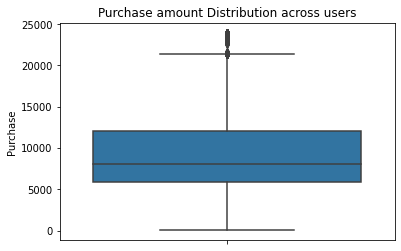

In [ ]:
sns.boxplot(data=data, y='Purchase', orient='h')
plt.title("Purchase amount Distribution across users")
plt.show()

Observations: From the above box plot, we can see the purchase amount has outliers.

In [ ]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
#distribution of Gender
data["Gender"].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

observations: given data set has higher male users.

In [ ]:
#distribution of Age
data["Age"].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

Observation: 26-35 year age group has higher contribution in the users.

In [ ]:
#distribution of City_Category
data["City_Category"].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

Observations: City category B has higher users.

In [ ]:
#distribution of Marital_Status
data["Marital_Status"].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

Observation: unmarried users are more as compared to married users.

In [ ]:
#distribution of Product_Category
data["Product_Category"].value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

Observations: product category 5 has higher contributions

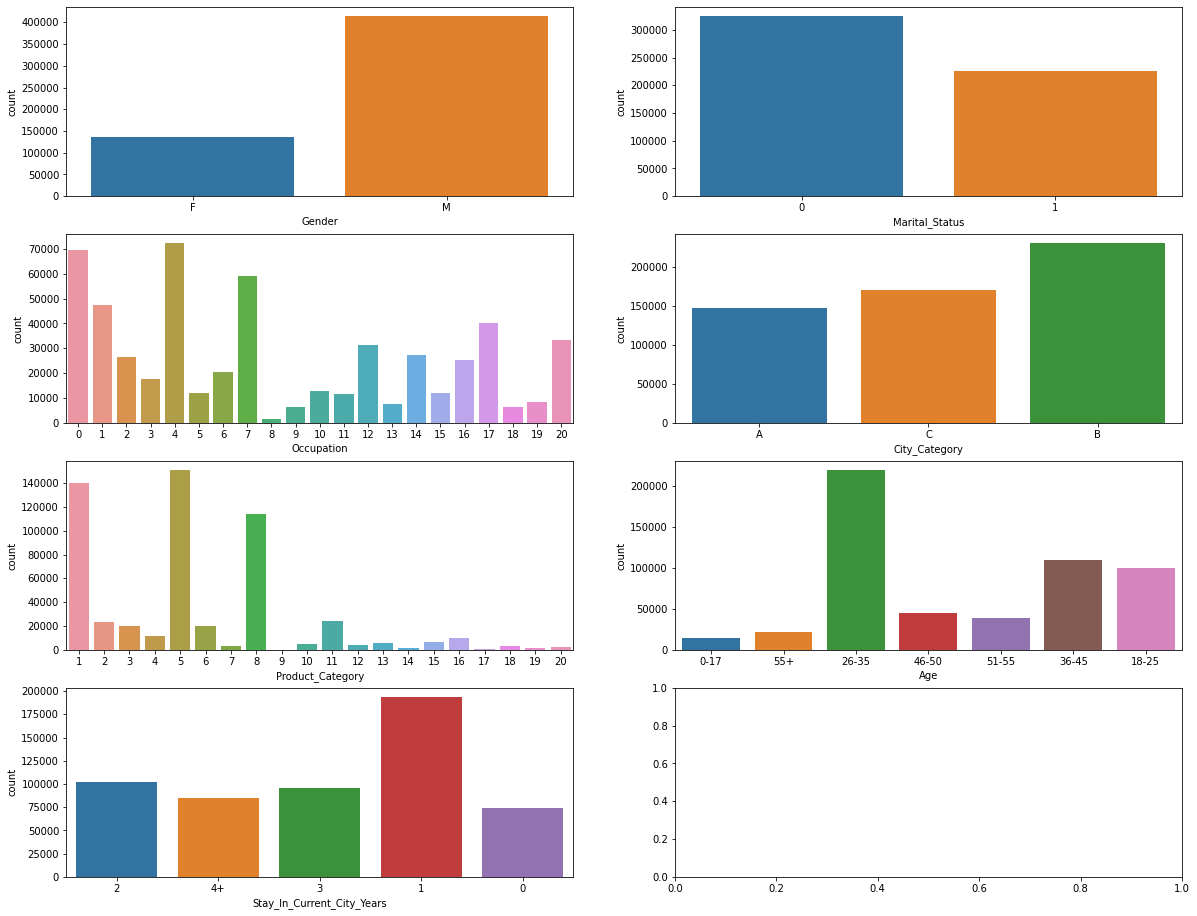

In [ ]:
#mapping univariate plots for differnt metrics to see their distribution in the data
figure, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
sns.countplot(data=data, x='Gender', ax=axis[0,0])
sns.countplot(data=data, x='Marital_Status', ax=axis[0,1])
sns.countplot(data=data, x='Occupation', ax=axis[1,0])
sns.countplot(data=data, x='City_Category', ax=axis[1,1])
sns.countplot(data=data, x='Product_Category', ax=axis[2,0])
sns.countplot(data=data, x='Age', ax=axis[2,1])
sns.countplot(data=data, x='Stay_In_Current_City_Years', ax=axis[3,0])
plt.show()

Observations: From the above chart we can clearly see more users are Single as compare to Married, users with 1 year stay in current city are higher.

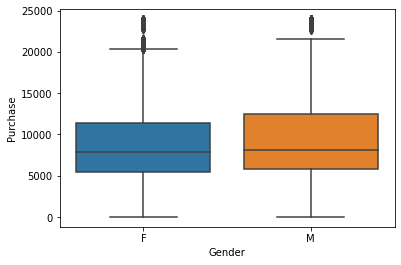

In [ ]:
#Bi-variate Analysis for Purchase vs Genders
sns.boxplot(data=data, y='Purchase', x='Gender')

Observation: From the above plot we can clearly infer, male has overall higher purchase amount.

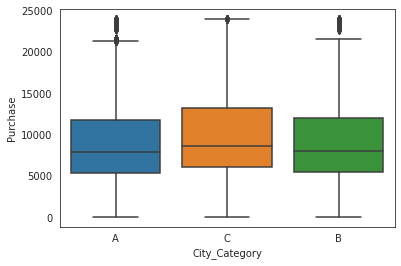

In [ ]:
#Bi-variate Analysis for Purchase vs Genders
sns.boxplot(data=data, y='Purchase', x='City_Category')

Observation: From the above plot we can clearly infer, city category "C" has overall higher purchase amount.

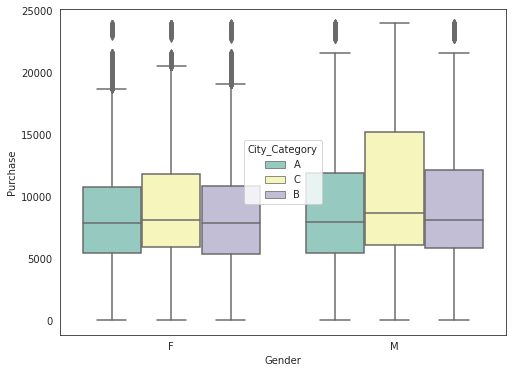

In [ ]:
#correlation between Purchase, Gender and City_Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Purchase', x='Gender', hue='City_Category', palette='Set3')

Observations: For both male and female users City Category "C" has highest purchase value.

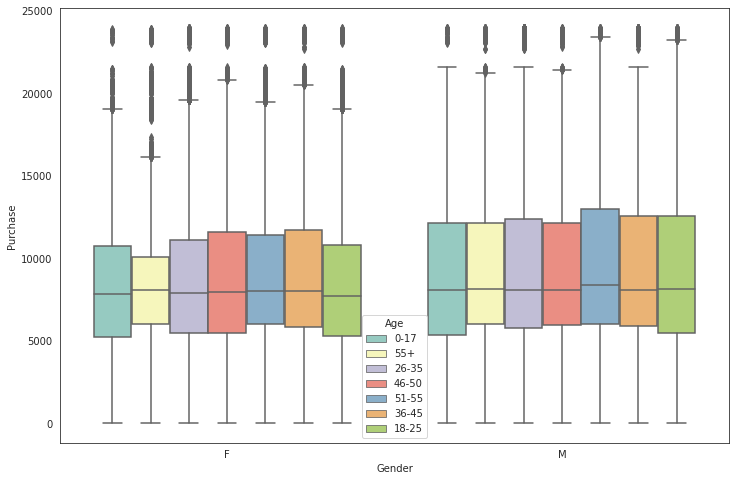

In [ ]:
#correlation between Purchase, Gender and Age
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Age', palette='Set3')

Observations: For male users 51-55 years age group has higher puchase value and for female users 36-45 years age group has highest purchase value.

In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
data[cols] = data[cols].astype('int64')

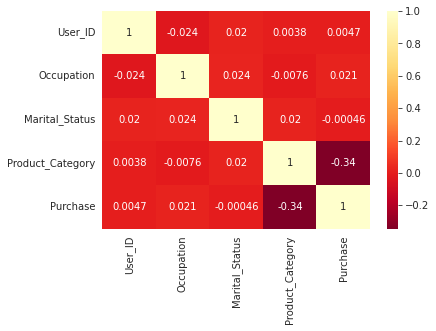

In [ ]:
#heat maps for correlation
sns.heatmap(data.corr(), cmap="YlOrRd_r", annot=True)

In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
data[cols] = data[cols].astype('object')

## Purchase trend across Gender

In [ ]:
#unique users distribution across Gender
amt_df = data.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [ ]:
#population average of purchase amount for male users
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean().round(2)
male_avg

925344.4

In [ ]:
#population average of purchase amount for Female users
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean().round(2)
female_avg

712024.39

Observations: Male users spend more money than female users.

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [ ]:
# Taking a sample size of 3000 for male and 1500 for female users and simulating it for 1000 times
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
  male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
  female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
  male_means.append(male_mean)
  female_means.append(female_mean)
print("Sample means of amount spend for Male in a sample size of 3000: {:.2f}".format(np.mean(male_means)))
print("Sample means of amount spend for Female in a sample size of 1500: {:.2f}".format(np.mean(female_means)))

print("Male - Population mean: {:.2f} Population std dev: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Population mean: {:.2f} Population std dev: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Sample means of amount spend for Male in a sample size of 3000: 925567.14
Sample means of amount spend for Female in a sample size of 1500: 712072.83
Male - Population mean: 925344.40 Population std dev: 985830.10
Female - Population mean: 712024.39 Population std dev: 807370.73


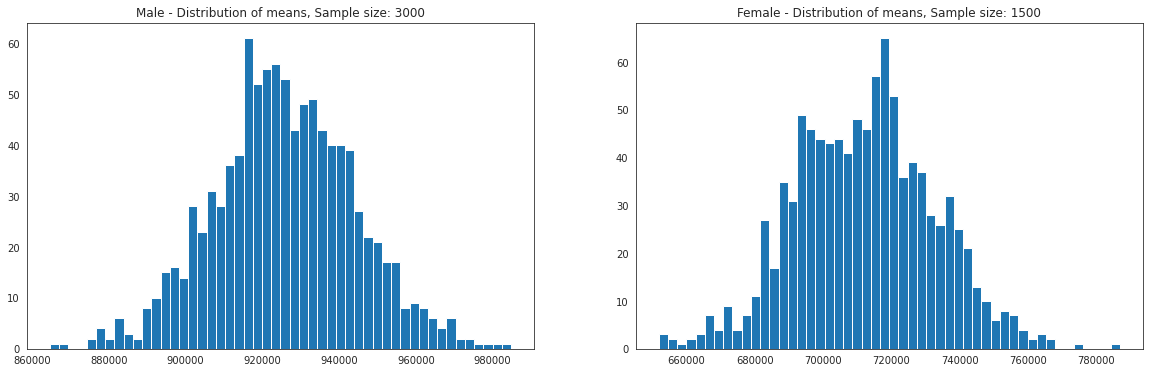

In [ ]:
#Distribution of samples
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=50)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].hist(female_means, bins=50)
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

Observation: From CLT, we can infer for the sample population that:
* Average amount spend by male customers is 925567.14
* Average amount spend by female customers is 712072.83

In [ ]:
#range for 95% Confidence Interval for male users
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
print("Male 95% confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))


Male 95% confidence interval of means: (895617.83, 955070.97)


In [ ]:
#range for 95% Confidence Interval for female users
female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Female 95% confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Female 95% confidence interval of means: (673254.77, 750794.02)


Observations: From above we can infer about the population that, 95% of the times:
* Average amount spend by male customer will lie in between: (895617.83, 955070.97)
* Average amount spend by female customer will lie in between: (673254.77, 750794.02)

We can clearly see that confidence intervals of average male and female spending is not overlapping and average male spending is higher than female.


## Purchase Trend across Marital_Status

In [ ]:
#unique users distribution across Marital_Status
amt_df = data.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

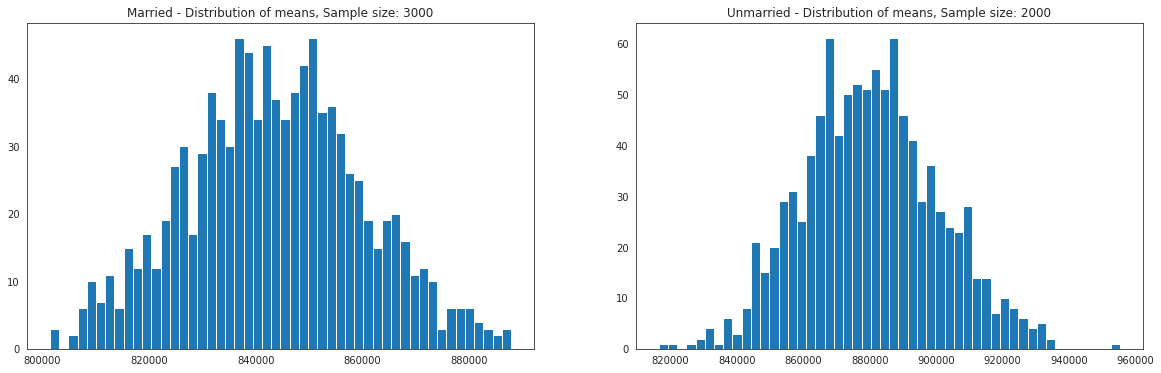

In [ ]:
# Taking a sample size of 3000 for Married and 2000 for Unmarried users and simulating it for 1000 times

marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=50)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].hist(unmarid_means, bins=50)
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")
plt.show()

In [ ]:
print("Sample means of amount spend for Married in a sample size of 3000: {:.2f}".format(np.mean(marid_means)))
print("Sample means of amount spend for Unmarried in a sample size of 2000: {:.2f}".format(np.mean(unmarid_means)))

print("Married - Population mean: {:.2f} Population std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Population mean: {:.2f} Population std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

Sample means of amount spend for Married in a sample size of 3000: 843450.51
Sample means of amount spend for Unmarried in a sample size of 2000: 880289.90
Married - Population mean: 843526.80 Population std: 935352.12
Unmarried - Population mean: 880575.78 Population std: 949436.25


Observation: From CLT, we can infer for the sample population that:
* Average amount spend by Married customers is 843450.51
* Average amount spend by Unmarried customers is 880289.90

In [ ]:
ms_df = data.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
ms_df = ms_df.reset_index()

In [ ]:
married_df = ms_df[ms_df['Marital_Status']==1]
unmarried_df = ms_df[ms_df['Marital_Status']==0]

In [ ]:
#range for 95% Confidence Interval for Married users
married_margin_of_error_clt = 1.96*married_df['Purchase'].std()/np.sqrt(len(married_df))
married_sample_mean = married_df['Purchase'].mean()
married_lower_lim = married_sample_mean - married_margin_of_error_clt
married_upper_lim = married_sample_mean + married_margin_of_error_clt
print("Married 95% confidence interval of means: ({:.2f}, {:.2f})".format(married_lower_lim, married_upper_lim))

Married 95% confidence interval of means: (806668.83, 880384.76)


In [ ]:
#range for 95% Confidence Interval for Unmarried users
unmarried_margin_of_error_clt = 1.96*unmarried_df['Purchase'].std()/np.sqrt(len(unmarried_df))
unmarried_sample_mean = unmarried_df['Purchase'].mean()
unmarried_lower_lim = unmarried_sample_mean - unmarried_margin_of_error_clt
unmarried_upper_lim = unmarried_sample_mean + unmarried_margin_of_error_clt
print("Unmarried 95% confidence interval of means: ({:.2f}, {:.2f})".format(unmarried_lower_lim, unmarried_upper_lim))

Unmarried 95% confidence interval of means: (848741.18, 912410.38)


Observations: From above we can infer about the population that, 95% of the times:
* Average amount spend by Married customer will lie in between: (806668.83, 880384.76)
* Average amount spend by Unmarried customer will lie in between: (848741.18, 912410.38)

We can clearly see that confidence intervals of average Married and Unmarried spending is overlapping.

## Purchase Trend across Age group

In [ ]:
#unique users distribution across Age group
amt_df = data.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
# Taking a sample size of 200 for differnt age group and simulating it for 1000 times
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []
for age_interval in age_intervals:
    for _ in range(num_repitions):
      mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
      all_means[age_interval].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val]
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt
    print("For age {} --> 95% confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> 95% confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> 95% confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> 95% confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> 95% confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> 95% confidence interval of means: (692392.43, 834009.42)
For age 55+ --> 95% confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> 95% confidence interval of means: (527662.46, 710073.17)


Observations: From above we can infer about the population that, 95% of the times:
* Average amount spend by age 26-35 group customer will lie in between: (945034.42, 1034284.21)
* Average amount spend by age 36-45 group customer will lie in between: (823347.80, 935983.62)
* Average amount spend by age 18-25 group customer will lie in between: (801632.78, 908093.46)
* Average amount spend by age 46-50 group customer will lie in between: (713505.63, 871591.93)
* Average amount spend by age 51-55 group customer will lie in between: (692392.43, 834009.42)
* Average amount spend by age 55+ group customer will lie in between: (476948.26, 602446.23)
* Average amount spend by age 0-17 group customer will lie in between: (527662.46, 710073.17)

We can clearly see that confidence intervals of average age 26-35 group customer spending is higher than age 36-45 group customers.

# Final Insights:

* 40% users belongs to 26-35 year age group, which is highest among all age group and aprox 80% of users belongs to 18 to 45 years age group.
* 42% users belongs to City category B, which is  highest among other.
* 60% of users are unmarried which is higher than married users.
* Product category 1, 5 and 8 has highest purchase frequency among other product category.
* male user has overall higher purchase amount.
* Average amount spend by Male customers: 925344.4
* Average amount spend by Female customers: 712024.39
* Users belongs to City Category "C" has highest spendings.
* number of users with 1 year stay in current city are higher.



# Recommendations:

* Walmart should focus on acquisition of customers who are in the age group of 18-45.
* It should focus on retaining the male customers and getting more male customers.
* It should focus on keeping high stock of products belongs to 1, 5 and 8 product category as those are high selling products.
* Company should focus on acquisition of unmarried users.
* City category B has highest numbers of user, so Walmart should focus on increasing users in A and C category City.
* Company should focus on users with 1 year stay in current city.
